# MACHINE LEARNING ASSIGNMENT

NAME : HIMANSHI JOSHI <BR>
ROLL NO : DS6A-2015

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as p1
import seaborn as sb

In [3]:
customer_data = pd.read_csv('ecommerce_customers_data.csv')

In [4]:
customer_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customer_data.shape

(2000, 8)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 2000 non-null   object 
 1   Address               2000 non-null   object 
 2   Avatar                2000 non-null   object 
 3   Avg. Session Length   2000 non-null   float64
 4   Time on App           2000 non-null   float64
 5   Time on Website       2000 non-null   float64
 6   Length of Membership  2000 non-null   float64
 7   Yearly Amount Spent   2000 non-null   float64
dtypes: float64(5), object(3)
memory usage: 125.1+ KB


In [7]:
customer_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,32.614367,11.806501,36.800084,3.574884,462.028765
std,1.822992,1.761988,1.708685,1.713984,88.239036
min,29.011449,8.501861,33.500972,0.269901,256.670582
25%,31.189122,10.477522,35.535484,2.274338,390.102315
50%,32.736029,11.833881,36.874785,3.559514,465.679476
75%,34.018190,13.153198,38.078270,4.890523,533.089304
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

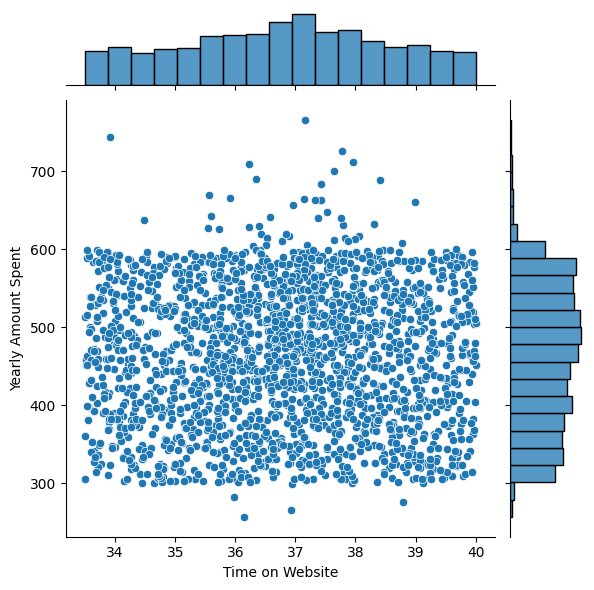

In [11]:
sb.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customer_data)

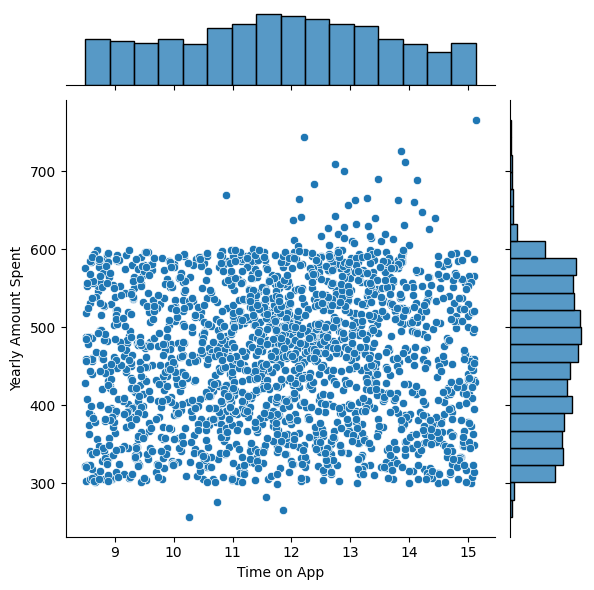

In [12]:
sb.jointplot(x='Time on App',y='Yearly Amount Spent',data=customer_data)

<Figure size 800x600 with 0 Axes>

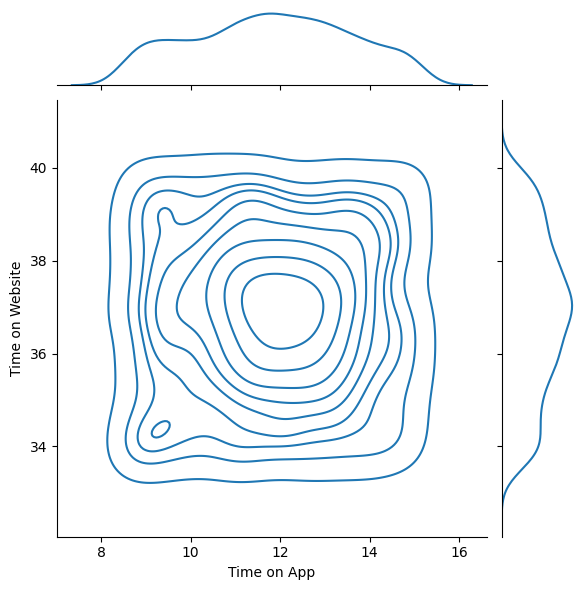

In [13]:
p1.figure(figsize=(8, 6))
sb.jointplot(x=customer_data["Time on App"], y=customer_data['Time on Website'], kind='kde')

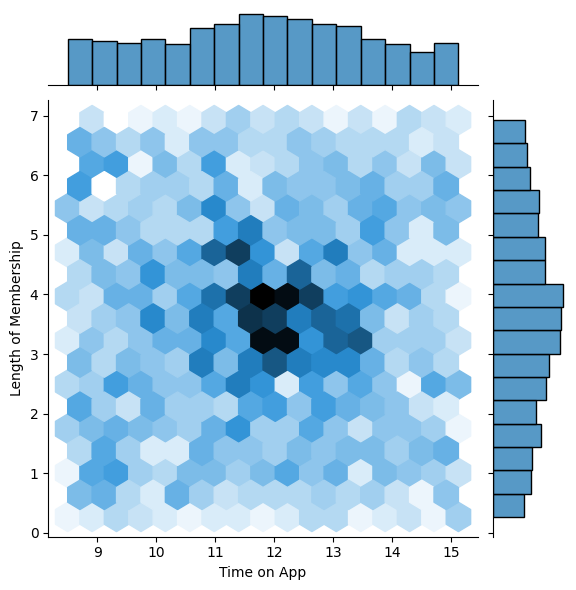

In [14]:
sb.jointplot(x='Time on App',y='Length of Membership',kind="hex",data=customer_data)

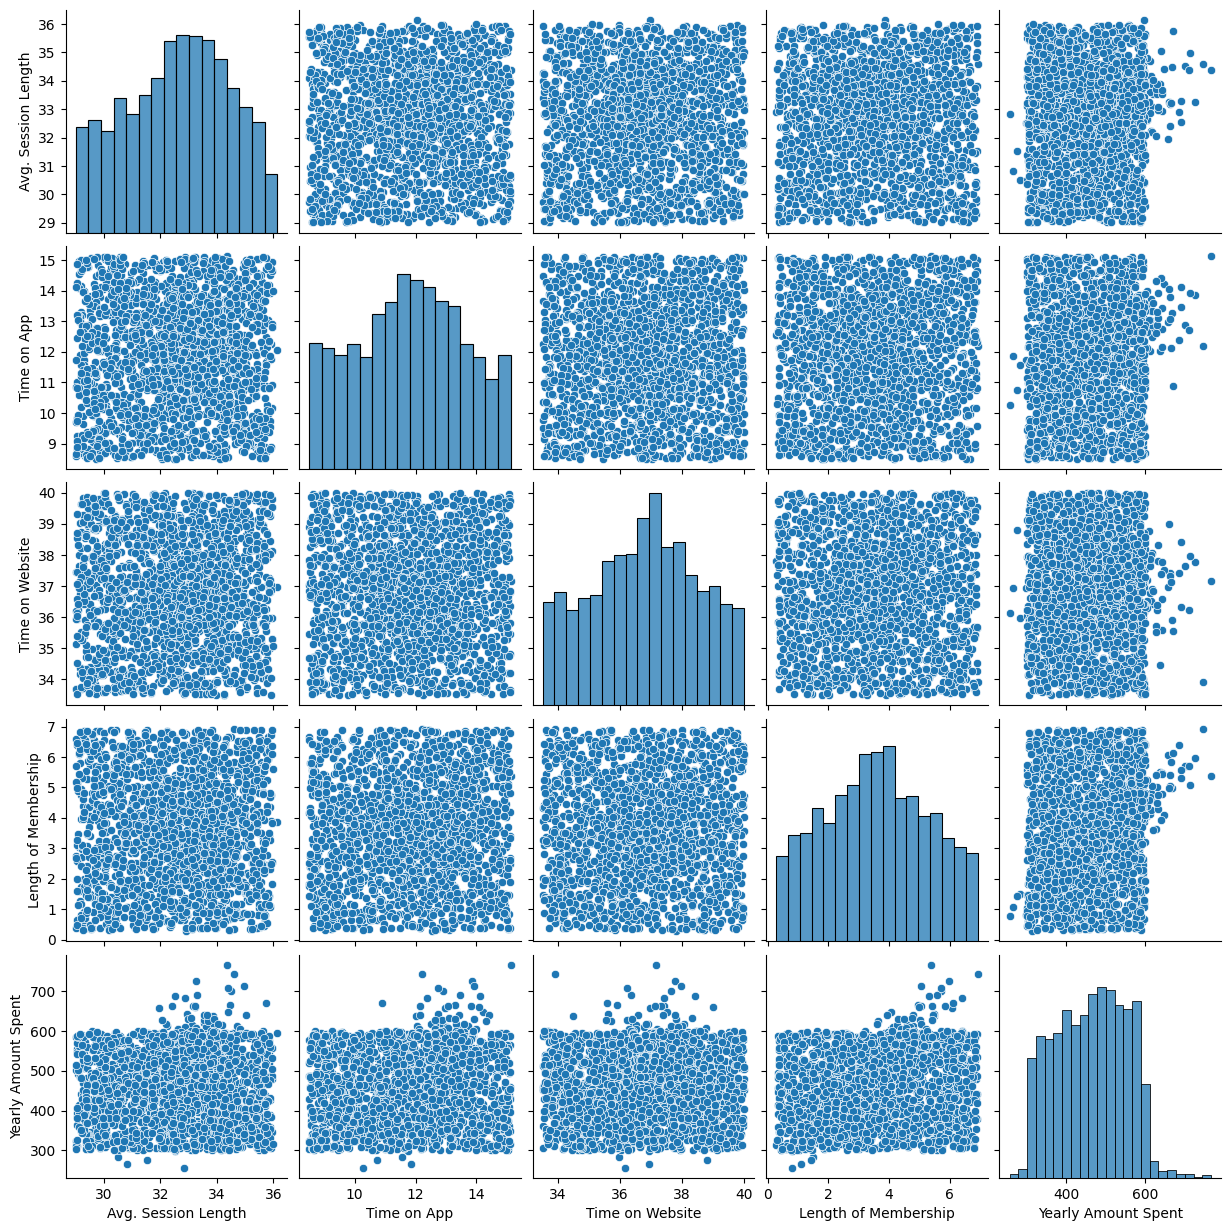

In [15]:
sb.pairplot(customer_data)

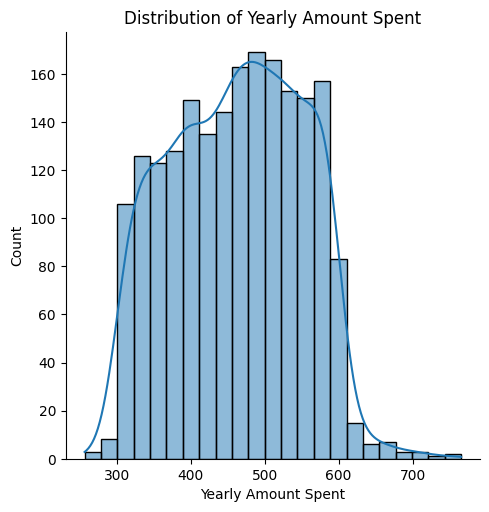

In [16]:
sb.displot(customer_data['Yearly Amount Spent'], kde=True)
p1.title('Distribution of Yearly Amount Spent')
p1.show()

## Split Training and Testing Data

In [17]:
X = customer_data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [18]:
y = customer_data['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

## Training the Model

### Model 1 Using Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

Predicting test data

In [24]:
y_pred_lr = lr.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr)

-0.004390301885409009

In [26]:
lr.score(X_test, y_test)

-0.004390301885409009

Evaluating the model

In [27]:
from sklearn import metrics
print("Mean absoulte error:" , metrics.mean_absolute_error(y_test, y_pred_lr))
print("Mean squared error:" , metrics.mean_squared_error(y_test, y_pred_lr))
print("Root mean squared error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean absoulte error: 74.40498127239603
Mean squared error: 7782.371734607211
Root mean squared error: 88.21775181111346


### Model 2 Using Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [30]:
dct = DecisionTreeRegressor()

In [31]:
dct.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
y_pred_dct = dct.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dct)

-0.6580578500610095

In [34]:
dct.score(X_test, y_test)

-0.6580578500610095

Evaluating the model

In [35]:
from sklearn import metrics
print("Mean absoulte error:" , metrics.mean_absolute_error(y_test, y_pred_dct))
print("Mean squared error:" , metrics.mean_squared_error(y_test, y_pred_dct))
print("Root mean squared error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_dct)))

Mean absoulte error: 89.83397240372302
Mean squared error: 12847.219375213139
Root mean squared error: 113.34557501381842


### Model 3 using Random forest regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [38]:
rfg = RandomForestRegressor()

In [39]:
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred_rfg = rfg.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfg)

0.0338934653705224

In [42]:
rfg.score(X_test, y_test)

0.0338934653705224

In [43]:
from sklearn import metrics
print("Mean absoulte error:" , metrics.mean_absolute_error(y_test, y_pred_rfg))
print("Mean squared error:" , metrics.mean_squared_error(y_test, y_pred_rfg))
print("Root mean squared error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg)))

Mean absoulte error: 69.846184753058
Mean squared error: 7485.7355488260855
Root mean squared error: 86.5201453352113


### Model 4 using SupportVectorMachine

In [44]:
from sklearn import svm

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [46]:
svmr = svm.SVR(kernel='linear')

In [47]:
svmr.fit(X_train, y_train)

SVR(kernel='linear')

In [48]:
y_pred_svr = svmr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_svr)

-0.0319380844295476

In [50]:
svmr.score(X_test, y_test)

-0.0319380844295476

Evaluating the model

In [51]:
from sklearn import metrics
print("Mean absoulte error:" , metrics.mean_absolute_error(y_test, y_pred_svr))
print("Mean squared error:" , metrics.mean_squared_error(y_test, y_pred_svr))
print("Root mean squared error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

Mean absoulte error: 74.87078998855185
Mean squared error: 7995.821709004784
Root mean squared error: 89.41935869264991


### Model Score Comparison

In [52]:
print("Linear Regression model score:",lr.score(X_test, y_test))
print("Decision Tree model score:",dct.score(X_test, y_test))
print("Random Forest Regression model score:",rfg.score(X_test, y_test))
print("Support Vector Regression model score:",svmr.score(X_test, y_test))

Linear Regression model score: -0.004390301885409009
Decision Tree model score: -0.6580578500610095
Random Forest Regression model score: 0.0338934653705224
Support Vector Regression model score: -0.0319380844295476


#### Linear Regression model gives best accuracy of 0.9834

#### Decision Tree model gives lowest accuracy of 0.8157

## Performing Hyperparameter tuning on Decision tree model to optimize model performance

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'max_depth': [1, 3, 5, 7, None],
    'min_samples_split': [2, 5, 6, 7, 10, 20],
    'min_samples_leaf': [0.5, 1, 2, 4, 5]
}

In [55]:
grid_search = GridSearchCV(estimator=dct, param_grid=param_grid, cv=10)

In [56]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, None],
                         'min_samples_leaf': [0.5, 1, 2, 4, 5],
                         'min_samples_split': [2, 5, 6, 7, 10, 20]})

In [57]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 7}
Best Score:  0.04963370505597808


In [58]:
print("Score of model before hyperparameter tuning: ", dct.score(X_test, y_test))
print("Score of model after hyperparameter tuning: ", grid_search.best_score_)
print("\nIncrease in model score: ", (grid_search.best_score_) - (dct.score(X_test, y_test)) )

Score of model before hyperparameter tuning:  -0.6580578500610095
Score of model after hyperparameter tuning:  0.04963370505597808

Increase in model score:  0.7076915551169876
